In [50]:
import numpy as np
import pandas as pd


In [51]:
weather = pd.read_csv("weather.csv",index_col="DATE")

In [52]:
weather.head()

,STATION,NAME,ACMH,ACSH,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT21,WT22,WV01
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,90.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",80.0,100.0,NaN,NaN,NaN,0.02,0.0,0.0,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",10.0,20.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",30.0,10.0,NaN,NaN,NaN,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
weather.shape

(19287, 44)

In [54]:
weather.isnull().sum()

STATION        0
NAME           0
ACMH        9672
ACSH        9671
AWND        5116
FMTM        9163
PGTM        7018
PRCP           0
SNOW           0
SNWD           2
TAVG       13123
TMAX           0
TMIN           0
TSUN       19256
WDF1        9676
WDF2        9618
WDF5        9701
WDFG       14166
WDFM       19286
WESD       13216
WSF1        9673
WSF2        9618
WSF5        9702
WSFG       11824
WSFM       19286
WT01       12155
WT02       18034
WT03       18000
WT04       18951
WT05       18923
WT06       19106
WT07       19179
WT08       15371
WT09       19147
WT11       19273
WT13       17102
WT14       18400
WT15       19245
WT16       12710
WT17       19227
WT18       18120
WT21       19282
WT22       19238
WV01       19286
dtype: int64

In [55]:
nullpct = weather.apply(pd.isnull).sum()/weather.shape[0]
nullpct

STATION    0.000000
NAME       0.000000
ACMH       0.501478
ACSH       0.501426
AWND       0.265256
FMTM       0.475087
PGTM       0.363872
PRCP       0.000000
SNOW       0.000000
SNWD       0.000104
TAVG       0.680406
TMAX       0.000000
TMIN       0.000000
TSUN       0.998393
WDF1       0.501685
WDF2       0.498678
WDF5       0.502981
WDFG       0.734484
WDFM       0.999948
WESD       0.685228
WSF1       0.501530
WSF2       0.498678
WSF5       0.503033
WSFG       0.613055
WSFM       0.999948
WT01       0.630217
WT02       0.935034
WT03       0.933271
WT04       0.982579
WT05       0.981127
WT06       0.990615
WT07       0.994400
WT08       0.796962
WT09       0.992741
WT11       0.999274
WT13       0.886711
WT14       0.954010
WT15       0.997822
WT16       0.658993
WT17       0.996889
WT18       0.939493
WT21       0.999741
WT22       0.997459
WV01       0.999948
dtype: float64

In [57]:
validcolumns = weather.columns[nullpct<0.05]
validcolumns

Index(['STATION', 'NAME', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [58]:
weather =  weather[validcolumns].copy()

In [59]:
weather.columns = weather.columns.str.lower()
weather

,station,name,prcp,snow,snwd,tmax,tmin
DATE,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21
...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43


In [60]:
weather = weather.ffill()


In [61]:
weather.isnull().sum()

station    0
name       0
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
dtype: int64

In [69]:
weather.apply(lambda x : (x==9999).sum())

station    0
name       0
prcp       0
snow       0
snwd       0
tmax       0
tmin       0
dtype: int64

In [70]:
weather.dtypes

station     object
name        object
prcp       float64
snow       float64
snwd       float64
tmax         int64
tmin         int64
dtype: object

In [72]:
weather.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15', '2022-10-16',
       '2022-10-17', '2022-10-18', '2022-10-19', '2022-10-20', '2022-10-21'],
      dtype='object', name='DATE', length=19287)

In [74]:
weather.index = pd.to_datetime(weather.index)

In [78]:
weather.index.year.value_counts().sort_index()

1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    294
Name: DATE, dtype: int64

<Axes: xlabel='DATE'>

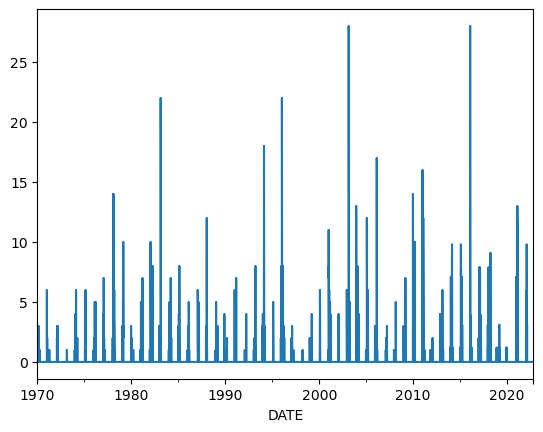

In [80]:
weather["snwd"].plot()

In [85]:
weather['target']= weather["tmax"].shift(-1)

In [86]:
weather

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0
...,...,...,...,...,...,...,...,...
2022-10-17,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.08,0.0,0.0,67,54,58.0
2022-10-18,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,58,48,56.0
2022-10-19,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,56,43,61.0


In [91]:
weather = weather.ffill()

In [93]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha = .1)

In [100]:
predictors =weather.columns[~weather.columns.isin(["target","name","station"])]

In [101]:
predictors

Index(['prcp', 'snow', 'snwd', 'tmax', 'tmin'], dtype='object')

In [103]:
weather.head()

,station,name,prcp,snow,snwd,tmax,tmin,target
DATE,,,,,,,,
1970-01-01,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,28,22,31.0
1970-01-02,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,22,38.0
1970-01-03,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.02,0.0,0.0,38,25,31.0
1970-01-04,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,31,23,35.0
1970-01-05,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,35,21,36.0


In [117]:
def backtest(weather,model,predictors,start = 3650,step = 90):
    all_pred = []
    
    for i in range(start,weather.shape[0],step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]
        
        model.fit(train[predictors],train['target'])
        
        preds = model.predict(test[predictors])
        preds = pd.Series(preds,index= test.index)
        combined= pd.concat([test["target"],preds],axis = 1)
        combined.columns=["actual","prediction"]
        combined["diff"]= (combined["prediction"]-combined["actual"]).abs()
        
        all_pred.append(combined)
    return pd.concat(all_pred)

In [118]:
predictions = backtest(weather,rr,predictors)


In [119]:
predictions

,actual,prediction,diff
DATE,,,
1979-12-30,43.0,50.229324,7.229324
1979-12-31,42.0,43.673798,1.673798
1980-01-01,41.0,41.579150,0.579150
1980-01-02,36.0,43.961887,7.961887
1980-01-03,30.0,40.204726,10.204726
...,...,...,...
2022-10-17,58.0,67.543412,9.543412
2022-10-18,56.0,60.511771,4.511771
2022-10-19,61.0,57.030435,3.969565


In [120]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(predictions["actual"],predictions["prediction"])

5.13932667966084

In [122]:
predictions.sort_values("diff",ascending = False)

,actual,prediction,diff
DATE,,,
2007-03-26,78.0,49.744725,28.255275
1999-01-02,53.0,25.911898,27.088102
1998-03-26,80.0,53.033957,26.966043
1985-04-18,84.0,57.071179,26.928821
1990-03-12,85.0,58.144310,26.855690
...,...,...,...
2006-08-20,88.0,88.002937,0.002937
2019-03-01,40.0,40.002460,0.002460
1992-06-11,76.0,76.001641,0.001641


In [124]:
pd.Series(rr.coef_,index = predictors)

prcp   -1.236110
snow   -0.407827
snwd    0.053422
tmax    0.447413
tmin    0.517302
dtype: float64

In [138]:
predictions

,actual,prediction,diff
DATE,,,
1980-01-13,54.0,33.970660,20.029340
1980-01-14,51.0,45.325178,5.674822
1980-01-15,45.0,46.685431,1.685431
1980-01-16,40.0,42.921183,2.921183
1980-01-17,41.0,41.109033,0.109033
...,...,...,...
2022-10-17,58.0,66.729423,8.729423
2022-10-18,56.0,61.955124,5.955124
2022-10-19,61.0,59.351146,1.648854


In [ ]:
def pct_diff(old,new):
    return(new-old)/old

def compute_rolling(weather,horizon,col):
    label = f"rolling_{rolling}_{col}"
    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"]= pct_diff(weather[label],weather[col])
    return weather

rolling_horizons=[3,14]
for horizon in rolling_horizons:
    for col in ["tmax","tmin","prcp"]:
        weather = compute_rolling(weather,horizon,col)

In [128]:
def expand_mean(df):
    return df.expanding(1).mean()

for col in ["tmax","tmin","prcp"]:
    weather[f"month_avg_col{col}"] = weather[col].groupby(weather.index.month,group_keys = False).apply(expand_mean)
    weather[f"day_avg_col{col}"] = weather[col].groupby(weather.index.day_of_year,group_keys = False).apply(expand_mean)

In [129]:
weather = weather.iloc[14:,:]
weather = weather.fillna(0)

In [130]:
predictors =weather.columns[~weather.columns.isin(["target","name","station"])]

In [131]:
predictions = backtest(weather,rr,predictors)
mean_absolute_error(predictions["actual"],predictions["prediction"])

4.8302784986459395

In [132]:
mean_squared_error(predictions["actual"],predictions["prediction"])

38.28109093989728

In [133]:
predictions.sort_values("diff",ascending = False)

,actual,prediction,diff
DATE,,,
1990-03-12,85.0,55.021841,29.978159
2007-03-26,78.0,50.101183,27.898817
1998-03-26,80.0,52.185041,27.814959
1997-02-26,71.0,44.486435,26.513565
2003-04-15,86.0,60.446306,25.553694
...,...,...,...
2020-06-09,79.0,79.001838,0.001838
1991-03-25,51.0,50.999313,0.000687
1989-10-13,70.0,69.999374,0.000626


In [134]:
weather.loc["1990-03-07":"1990-03-17"]

,station,name,prcp,snow,snwd,tmax,tmin,target,month_avg_coltmax,day_avg_coltmax,month_avg_coltmin,day_avg_coltmin,month_avg_colprcp,day_avg_colprcp
DATE,,,,,,,,,,,,,,
1990-03-07,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,2.0,32,14,39.0,48.590112,45.428571,34.567783,31.857143,0.119410,0.111429
1990-03-08,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,1.0,39,20,43.0,48.574841,46.571429,34.544586,31.190476,0.119220,0.076667
1990-03-09,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.01,0.0,0.0,43,29,47.0,48.565978,45.619048,34.535771,30.952381,0.119046,0.036190
1990-03-10,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.01,0.0,0.0,47,39,59.0,48.563492,43.809524,34.542857,31.761905,0.118873,0.071905
1990-03-11,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.05,0.0,0.0,59,41,59.0,48.580032,46.142857,34.553090,31.904762,0.118764,0.126667
1990-03-12,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,59,43,85.0,48.596519,48.142857,34.566456,34.285714,0.118576,0.167619
1990-03-13,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,85,41,62.0,48.654028,48.761905,34.576619,34.285714,0.118389,0.091429
1990-03-14,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,62,46,55.0,48.675079,50.190476,34.594637,36.809524,0.118202,0.259524
1990-03-15,USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",0.00,0.0,0.0,55,43,62.0,48.685039,49.714286,34.607874,35.761905,0.118016,0.066667


<Axes: >

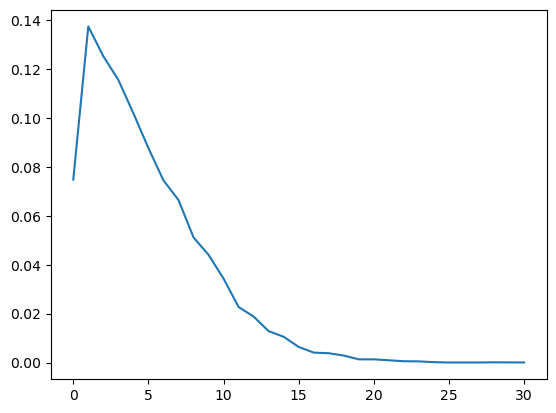

In [136]:
(predictions["diff"].round().value_counts().sort_index()/predictions.shape[0]).plot()

In [137]:
predictions

,actual,prediction,diff
DATE,,,
1980-01-13,54.0,33.970660,20.029340
1980-01-14,51.0,45.325178,5.674822
1980-01-15,45.0,46.685431,1.685431
1980-01-16,40.0,42.921183,2.921183
1980-01-17,41.0,41.109033,0.109033
...,...,...,...
2022-10-17,58.0,66.729423,8.729423
2022-10-18,56.0,61.955124,5.955124
2022-10-19,61.0,59.351146,1.648854
